# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [5]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


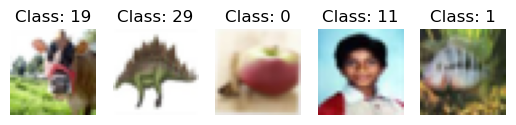

In [6]:
import matplotlib.pyplot as plt

# Print the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Display a few images from the training set
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [7]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training set shape after split:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Training labels shape after split:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training set shape after split: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Training labels shape after split: (40000, 100)
Validation labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [9]:
from keras.optimizers import Adam

# Select loss function and optimizer
loss_function = 'categorical_crossentropy'
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

print("Loss function:", loss_function)
print("Optimizer:", optimizer)


Loss function: categorical_crossentropy
Optimizer: <keras.optimizers.optimizer_v2.adam.Adam object at 0x0000021DDC9D8D00>


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/20
1250/1250 [==============================] - 113s 90ms/step - loss: 4.2793 - accuracy: 0.0429 - val_loss: 3.8752 - val_accuracy: 0.1115
Epoch 2/20
1250/1250 [==============================] - 110s 88ms/step - loss: 3.8185 - accuracy: 0.1099 - val_loss: 3.4787 - val_accuracy: 0.1785
Epoch 3/20
1250/1250 [==============================] - 109s 87ms/step - loss: 3.5783 - accuracy: 0.1493 - val_loss: 3.2392 - val_accuracy: 0.2143
Epoch 4/20
1250/1250 [==============================] - 104s 83ms/step - loss: 3.4184 - accuracy: 0.1752 - val_loss: 3.1496 - val_accuracy: 0.2284
Epoch 5/20
1250/1250 [==============================] - 108s 86ms/step - loss: 3.2838 - accuracy: 0.2046 - val_loss: 3.0386 - val_accuracy: 0.2553
Epoch 6/20
1250/1250 [==============================] - 110s 88ms/step - loss: 3.1735 - accuracy: 0.2227 - val_loss: 2.9141 - val_accuracy: 0.2805
Epoch 7/20
1250/1250 [==============================] - 108s 86ms/step - loss: 3.0766 - accuracy: 0.2396 - val_loss: 2

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print("Test accuracy:", test_accuracy)

# Other metric: F1 Score
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

f1 = f1_score(y_true, y_pred_classes, average='macro')
print("F1 Score:", f1)


313/313 [==============================] - 2s 6ms/step - loss: 2.6586 - accuracy: 0.3404
Test accuracy: 0.34040001034736633
313/313 [==============================] - 2s 7ms/step
F1 Score: 0.3335441514821244


Accuracy: 0.3404
Other metric: F1 Score
Reason for selection: The F1 Score is selected because it provides a balance between precision and recall, which is important for evaluating the performance of a classifier, especially in cases where the data might be imbalanced. Precision measures the accuracy of the positive predictions (i.e., how many of the predicted positives are actually positive), while recall measures the ability of the classifier to find all the positive samples. The F1 Score is the harmonic mean of these two metrics, offering a single measure that accounts for both false positives and false negatives.
Value of metric: 0.3335
Interpretation of metric value: An F1 Score of 0.3335 indicates that the harmonic mean of precision and recall is around 33.35%. This means that the model's ability to correctly classify positive cases while maintaining a balance between precision and recall is relatively low. It highlights that there is room for improvement in the model's classification performance, particularly in terms of reducing false positives and false negatives

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

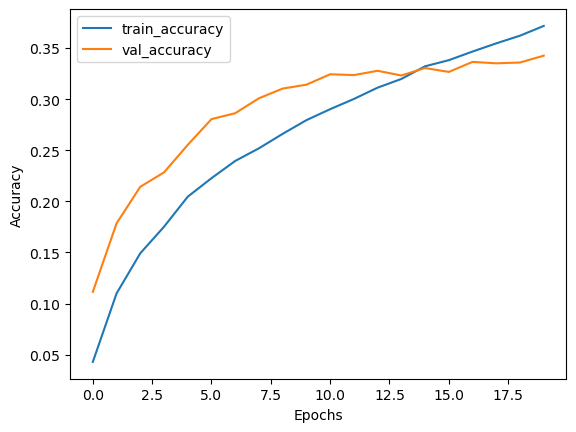

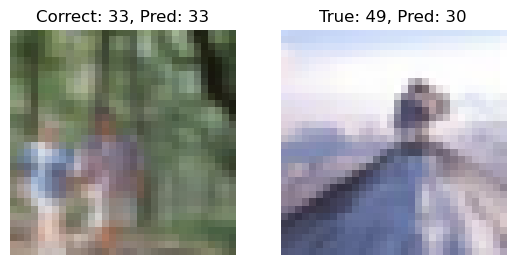

Classification probabilities for correct prediction: [3.67362895e-06 6.04586035e-04 2.79831409e-04 6.54582726e-03
 1.24725257e-03 1.09718717e-03 1.07372172e-04 6.04877248e-04
 6.68284576e-03 6.10624533e-03 2.06396147e-03 5.53609862e-04
 7.60122389e-03 5.53998339e-04 1.29199633e-03 4.89439443e-03
 4.67188098e-03 3.21987853e-03 1.61862746e-02 2.77649239e-03
 3.74518640e-05 1.81680225e-04 6.89973822e-03 7.52903579e-05
 5.90594027e-05 5.53944940e-03 2.06178840e-04 1.70100981e-03
 1.46240904e-03 3.30621260e-03 9.30019523e-05 8.87748972e-03
 1.85435289e-03 3.86152625e-01 4.54184134e-03 2.60174944e-04
 8.44403461e-04 3.63673526e-03 1.05265547e-02 2.66532204e-03
 4.02049953e-03 4.00469173e-04 7.72231724e-03 1.49456697e-04
 9.38482676e-03 1.85250305e-03 1.65604753e-04 1.49900210e-03
 1.11621506e-04 1.52946246e-04 2.39334591e-02 1.08561339e-02
 1.83100725e-04 5.35569882e-07 3.01102002e-04 6.49364525e-03
 1.33133521e-02 1.71500898e-03 3.65632422e-06 1.46344611e-02
 3.74778756e-05 5.34563907e-04 1

In [12]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Select an image that the model correctly classified
correct_idx = [i for i in range(len(y_true)) if y_true[i] == y_pred_classes[i]][0]
incorrect_idx = [i for i in range(len(y_true)) if y_true[i] != y_pred_classes[i]][0]

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correct: {y_true[correct_idx]}, Pred: {y_pred_classes[correct_idx]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"True: {y_true[incorrect_idx]}, Pred: {y_pred_classes[incorrect_idx]}")
plt.axis('off')
plt.show()

# Report model's classification probabilities for each
print("Classification probabilities for correct prediction:", y_pred[correct_idx])
print("Classification probabilities for incorrect prediction:", y_pred[incorrect_idx])


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [13]:
# Implement a technique such as data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the model using the data generator
history_aug = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                        epochs=20,
                        validation_data=(x_val, y_val))


Epoch 1/20
1250/1250 [==============================] - 111s 88ms/step - loss: 3.4271 - accuracy: 0.1883 - val_loss: 2.7398 - val_accuracy: 0.3139
Epoch 2/20
1250/1250 [==============================] - 111s 89ms/step - loss: 3.3437 - accuracy: 0.1968 - val_loss: 2.7800 - val_accuracy: 0.3040
Epoch 3/20
1250/1250 [==============================] - 116s 93ms/step - loss: 3.2911 - accuracy: 0.2072 - val_loss: 2.7916 - val_accuracy: 0.2991
Epoch 4/20
1250/1250 [==============================] - 112s 90ms/step - loss: 3.2723 - accuracy: 0.2096 - val_loss: 2.7308 - val_accuracy: 0.3148
Epoch 5/20
1250/1250 [==============================] - 117s 94ms/step - loss: 3.2298 - accuracy: 0.2119 - val_loss: 2.7892 - val_accuracy: 0.3013
Epoch 6/20
1250/1250 [==============================] - 114s 91ms/step - loss: 3.2216 - accuracy: 0.2190 - val_loss: 2.7163 - val_accuracy: 0.3161
Epoch 7/20
1250/1250 [==============================] - 114s 91ms/step - loss: 3.1927 - accuracy: 0.2221 - val_loss: 2

Data augmentation is a technique used to artificially expand the size of a training dataset by creating modified versions of the existing images. This can help prevent overfitting, as the model gets exposed to more variations of the data, improving its ability to generalize to new, unseen data. Common data augmentation techniques include random rotations, shifts, flips, and changes in lighting conditions.

Hyperparameters and Selection:

rotation_range=20: Rotates the image randomly within a range of 20 degrees.
width_shift_range=0.2: Shifts the image horizontally by a factor of 0.2 of the total width.
height_shift_range=0.2: Shifts the image vertically by a factor of 0.2 of the total height.
horizontal_flip=True: Randomly flips the image horizontally.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

313/313 [==============================] - 2s 5ms/step - loss: 2.6253 - accuracy: 0.3334
Test accuracy after enhancement: 0.33340001106262207
313/313 [==============================] - 2s 7ms/step
F1 Score after enhancement: 0.3158072478183017


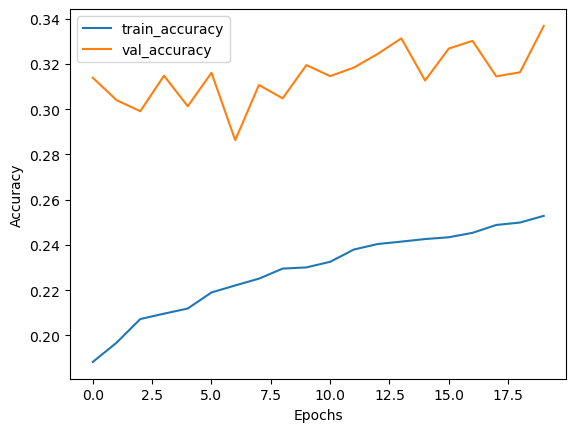

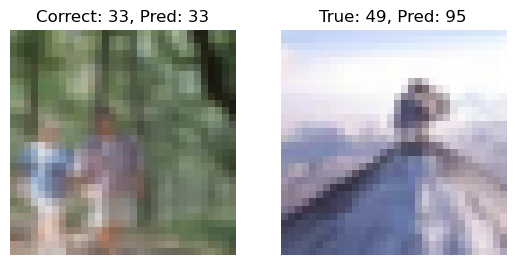

Classification probabilities for correct prediction (enhanced): [1.35587311e-06 8.75261892e-03 1.00436492e-03 3.80245014e-03
 1.22085484e-02 3.80813144e-03 4.24145430e-04 9.96221439e-04
 9.17312037e-03 1.34223455e-03 2.17332342e-03 5.83257817e-04
 7.47891888e-03 4.35173162e-04 1.35534187e-03 4.81152628e-03
 6.31699746e-04 3.21742380e-03 2.68264376e-02 5.18139778e-03
 1.37084164e-04 2.30416015e-04 2.11289641e-03 1.87480866e-04
 3.88805529e-05 7.49674998e-03 4.09680605e-03 4.99744155e-02
 3.88615153e-04 7.50137726e-03 2.01589370e-04 8.10075272e-03
 1.17925163e-02 1.49155527e-01 2.04797704e-02 4.95851855e-04
 2.75453576e-03 1.67985428e-02 2.46143006e-02 6.45856978e-03
 2.56293482e-04 3.84511717e-04 4.96644340e-02 3.55484989e-03
 1.85917206e-02 6.11471385e-03 1.67081147e-04 2.00190442e-03
 1.87269194e-04 3.27574497e-04 2.78889444e-02 1.50375701e-02
 2.79478641e-04 2.05830275e-07 1.87130296e-04 7.03327870e-03
 6.25643786e-03 4.39161784e-04 3.43252730e-04 4.63036494e-03
 3.39689286e-05 1.012

In [14]:
# Evaluate the enhanced model on the test set
test_loss_aug, test_accuracy_aug = model.evaluate(x_test, y_test)

print("Test accuracy after enhancement:", test_accuracy_aug)

# Recalculate F1 score for enhanced model
y_pred_aug = model.predict(x_test)
y_pred_classes_aug = y_pred_aug.argmax(axis=1)

f1_aug = f1_score(y_true, y_pred_classes_aug, average='macro')
print("F1 Score after enhancement:", f1_aug)

# Plot training and validation accuracy for enhanced model
plt.plot(history_aug.history['accuracy'], label='train_accuracy')
plt.plot(history_aug.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display correct and incorrect classification with enhanced model
correct_idx_aug = [i for i in range(len(y_true)) if y_true[i] == y_pred_classes_aug[i]][0]
incorrect_idx_aug = [i for i in range(len(y_true)) if y_true[i] != y_pred_classes_aug[i]][0]

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx_aug])
plt.title(f"Correct: {y_true[correct_idx_aug]}, Pred: {y_pred_classes_aug[correct_idx_aug]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx_aug])
plt.title(f"True: {y_true[incorrect_idx_aug]}, Pred: {y_pred_classes_aug[incorrect_idx_aug]}")
plt.axis('off')
plt.show()

print("Classification probabilities for correct prediction (enhanced):", y_pred_aug[correct_idx_aug])
print("Classification probabilities for incorrect prediction (enhanced):", y_pred_aug[incorrect_idx_aug])


Based on the results, the enhanced model did not improve in accuracy or F1 Score.

Results Comparison:

Baseline Test Accuracy: 0.3404
Baseline F1 Score: 0.3335
Enhanced Test Accuracy: 0.3334
Enhanced F1 Score: 0.3158
Interpretation:

The test accuracy slightly decreased after implementing data augmentation.
The F1 Score also decreased, indicating a drop in the model's ability to balance precision and recall.

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The enhanced model using data augmentation did not improve performance. The test accuracy decreased slightly from 0.3404 to 0.3334, and the F1 Score dropped from 0.3335 to 0.3158.

Did the model's performance improve?
No, the model's performance did not improve with data augmentation.

Why do you think this is?
The likely reasons include overfitting to the augmented data, introduction of noise rather than useful variation, or suboptimal augmentation parameters that might have distorted the images excessively.

Do you think there is room for further improvement? Why or why not?
Yes, there is room for further improvement. The results suggest that the model might benefit from fine-tuning augmentation parameters, using different regularization techniques, or experimenting with more advanced architectures to better capture the features of the CIFAR-100 dataset.

What other techniques might you try in the future?
Future techniques to try include:

Hyperparameter Tuning: Use grid search or random search to find optimal augmentation parameters and model hyperparameters.
Regularization Methods: Implement dropout, weight decay, or batch normalization.
Advanced Architectures: Explore deeper networks, residual connections, or transfer learning with pre-trained models.
Ensemble Methods: Combine multiple models to improve robustness and performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.